**Group B - Assginment 3**

Problem Statememt

Visualize the data using Python libraries matplotlib, seaborn by
plotting the graphs for assignment number 1 and 2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**READING DATA FROM CSV**

In [2]:
df = pd.read_csv("Airquality.csv")
df.head(12)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,NaN
4,5,NaN,NaN,14.3,56,5,5,High
5,6,28.0,NaN,14.9,66,5,6,Low
6,7,23.0,299.0,8.6,65,5,7,NaN
7,8,19.0,99.0,13.8,59,5,8,High
8,9,8.0,19.0,20.1,61,5,9,Low
9,10,NaN,194.0,8.6,69,5,10,High


In [3]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity       5
dtype: int64

**DATA CLEANING**

In [4]:
df = df.drop("Unnamed: 0",axis=1)
df.head(6)

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,High
1,36.0,118.0,8.0,72,5,2,High
2,12.0,149.0,12.6,74,5,3,Low
3,18.0,313.0,11.5,62,5,4,NaN
4,NaN,NaN,14.3,56,5,5,High
5,28.0,NaN,14.9,66,5,6,Low


**REPLACING NULL NUMERICAL VALUES**

In [5]:
df['Ozone']=df['Ozone'].fillna(df['Ozone'].mean())
df['Solar.R']=df['Solar.R'].fillna(df['Solar.R'].mean())
df["Wind"] = df["Wind"].fillna(df["Wind"].mean())

In [6]:
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mode()[0])
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

**DATA TRANSFORMATION**

**by label encoading**

In [7]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Humidity']=label.fit_transform(df['Humidity'])
df['Humidity'].unique()

array([0, 1, 2])

**VISUALIZATION OF DATA**

**A) scatter plot**

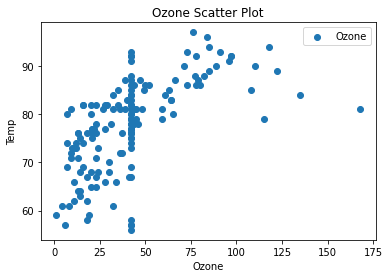

In [8]:
plt.scatter(x = df["Ozone"],y = df["Temp"])
plt.legend(["Ozone"])
plt.xlabel("Ozone")
plt.ylabel("Temp")
plt.title("Ozone Scatter Plot")
plt.show()

**b) Bar plot**

C:\python37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Temp'>

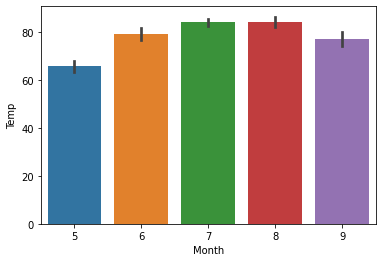

In [9]:
import seaborn as sns
sns.barplot(df["Month"],df["Temp"])

<AxesSubplot:>

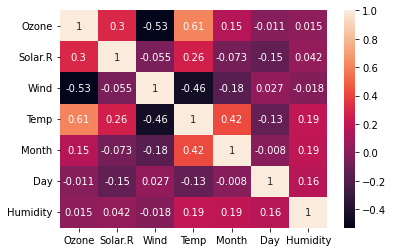

In [10]:
corr = df.corr()
sns.heatmap(corr, annot = True)

**c) pairplot**

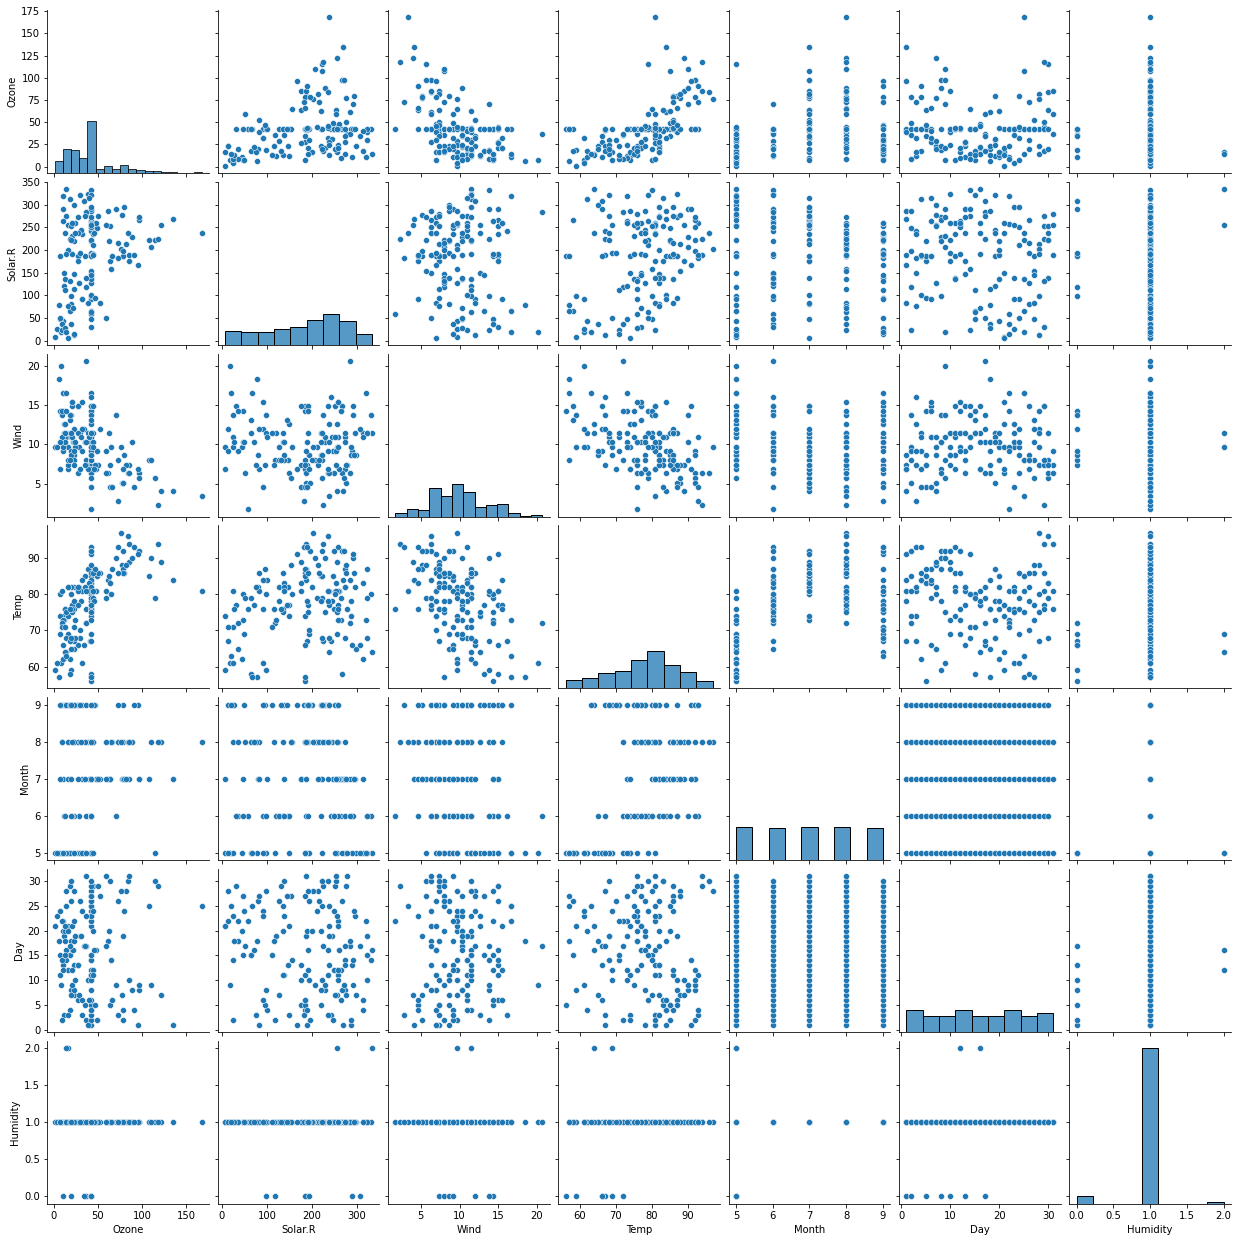

In [11]:
sns.pairplot(df)

**d) line Graph**

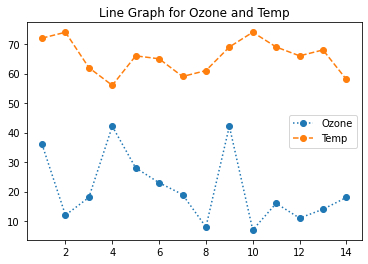

In [12]:
h = df.iloc[1:15, 0]
v = df.iloc[1:15, 3]
plt.plot(h, label="Ozone", marker="o", linestyle="dotted")
plt.plot(v, label="Temp", marker="o", linestyle="dashed")
plt.title("Line Graph for Ozone and Temp")
plt.legend()
plt.show()

**f) box plot**

<AxesSubplot:xlabel='Month', ylabel='Temp'>

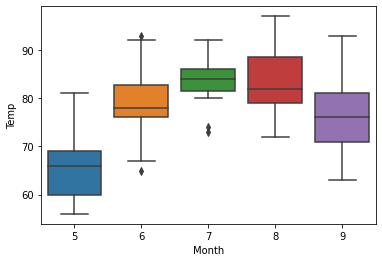

In [13]:
sns.boxplot(x=df["Month"],y=df["Temp"])

**g) Pie-Chart**

Text(0.5, 1.0, 'Factors')

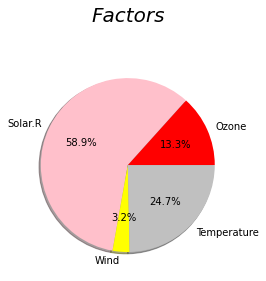

In [14]:
labels= ['Ozone','Solar.R','Wind','Temperature']
sizes=[df['Ozone'].mean(),df["Solar.R"].mean(),df['Wind'].mean(),df["Temp"].mean()]
colors=['red','pink','yellow','silver']
textprops = {"fontsize":15}
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Factors", fontsize=20, style="italic", pad=35)


**h) Histogram**

Text(0.5, 0, 'Humidity')

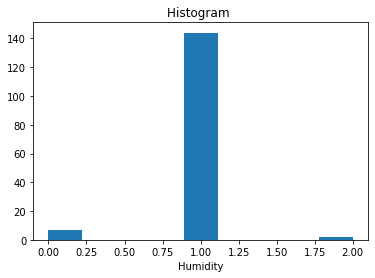

In [15]:
h=df.iloc[:,-1]
plt.hist(h,bins='auto')
plt.title('Histogram ')
plt.xlabel("Humidity")

**I) word count**

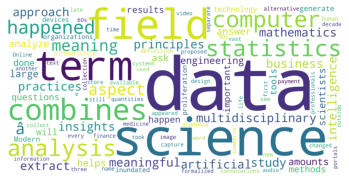

In [18]:
from wordcloud import WordCloud, STOPWORDS
text = open("word_cloud.txt").read()
wrd_cld = WordCloud(background_color="white", height=2225, width=4450).generate(text)
plt.imshow(wrd_cld)
plt.axis("off")
plt.show()